# Backpropagation com PyTorch

In [20]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


### Criação da Classe chamanda NeuralNet

$ \text{Sigmoid}(x) = \sigma(x) = \frac{1}{1 + \exp(-x)} $

In [32]:
class NeuralNet:
    def __init__(self):
        self.w1, self.w2, self.w3, self.w4 = np.random.randn(4)
        self.b1, self.b2, self.b3 = np.random.randn(3)
        self.lr = 0.01 # Taxa de aprendizado

    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))

    def sigmoid_derivative(self, X):
        return X * (1 - X)

    def forward(self, X):
        self.z1 = self.w1 * X + self.b1
        self.a1 = self.sigmoid(self.z1)

        self.z2 = self.w2 * self.a1 + self.b2
        self.a2 = self.sigmoid(self.z2)

        self.z3 = self.w3 * self.a2 + self.b3
        self.output = self.sigmoid(self.z3)

        return self.output

    def backward(self, X, y):
        error = y - self.output
        d_output = error * self.sigmoid_derivative(self.output)

        d_z2 = d_output * self.w3 * self.sigmoid_derivative(self.a2)
        d_w3 = self.a2 * d_output
        d_b3 = d_output
        
        d_z1 = d_z2 * self.w2 * self.sigmoid_derivative(self.a1)
        d_w2 = self.a1 * d_z2
        d_b2 = d_z2
        
        d_w1 = X * d_z1
        d_b1 = d_z1
        
        # Atualiza os pesos
        self.w1 += self.lr * d_w1
        self.w2 += self.lr * d_w2
        self.w3 += self.lr * d_w3
        self.b1 += self.lr * d_b1
        self.b2 += self.lr * d_b2
        self.b3 += self.lr * d_b3

    def train(self, X, Y, epochs=1000):
        errors = []
        for _ in range(epochs):
            total_error = 0
            for x, y in zip(X, Y):
                self.forward(x)
                total_error += (y - self.output) ** 2
                self.backward(x, y)
            errors.append(total_error / len(X))
        return errors

Dados de entrada (pequeno exemplo)

In [33]:
X = np.array([0,1,2,3])
Y = np.array([0,1,1,0])

In [34]:
nn_model = NeuralNet()
errors_model = nn_model.train(X, Y)

## Implementação no PyTorch

In [35]:
class NeuralNetTorch(nn.Module):
    def __init__(self):
        super(NeuralNetTorch, self).__init__()
        self.dense1 = nn.Linear(1, 3)
        self.dense2 = nn.Linear(3, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, X):
        X = self.sigmoid(self.dense1(X))
        X = self.sigmoid(self.dense2(X))
        return X

### Criando a rede e definindo otimizador e perda

In [36]:
model = NeuralNetTorch()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

### Preparando os dados

In [37]:
X_torch = torch.tensor(X, dtype=torch.float32).view(-1, 1)
Y_torch = torch.tensor(Y, dtype=torch.float32).view(-1, 1)

In [38]:
# Treinamento da rede no PyTorch
torch_errors = []
for epoch in range(1000):
    optimizer.zero_grad()
    output = model(X_torch)
    loss = criterion(output, Y_torch)
    loss.backward()
    optimizer.step()
    torch_errors.append(loss.item())

print("Treinamento concluído!")

Treinamento concluído!


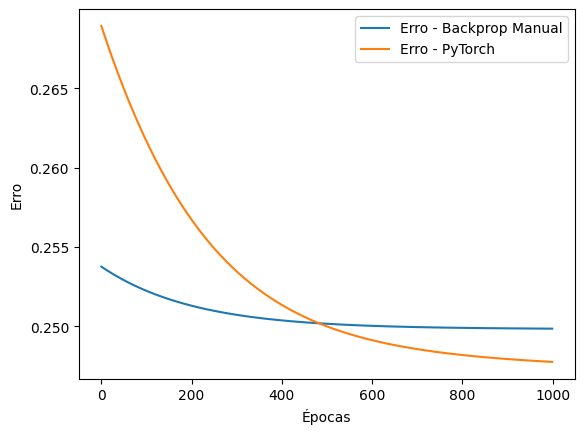

In [39]:
# Plotando a curva de erro
plt.plot(errors_model, label='Erro - Backprop Manual')
plt.plot(torch_errors, label='Erro - PyTorch')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend()
plt.show()

## **Explicação do Código**

### **1. Implementação Manual do Backpropagation**
A classe `ManualNeuralNet` representa uma **rede neural simples** com uma camada oculta e uma saída. O treinamento segue o **algoritmo de backpropagation**:

📌 **Passos do Backpropagation:**
1. **Inicialização dos Pesos e Vieses**: Iniciamos os pesos (`w1, w2, w3, w4`) e vieses (`b1, b2, b3`) com valores aleatórios.
2. **Forward Pass**:
   - Calculamos as ativações das camadas com a **função sigmoide**.
   - A equação básica de cada neurônio é \( z = w \cdot x + b \), seguida de \( a = \text{sigmoid}(z) \).
3. **Cálculo do erro**: A diferença entre a saída esperada e a saída da rede.
4. **Backward Pass**:
   - Derivamos a função sigmoide para calcular os gradientes.
   - Atualizamos os pesos e vieses usando **gradiente descendente**.

### **2. Implementação no PyTorch**
O **PyTorch** já automatiza o cálculo de gradientes, então o código fica mais simples:

📌 **Passos:**
1. Criamos uma rede com `nn.Linear` (camadas totalmente conectadas).
2. Utilizamos a **função sigmoide** para ativação.
3. Definimos a função de erro `MSELoss` e o otimizador `SGD`.
4. Treinamos a rede por **1000 épocas**, ajustando os pesos automaticamente.

---

## **Como Visualizar os Resultados?**
Para ver os resultados, podemos:
1. **Imprimir os pesos e vieses finais** após o treinamento.
2. **Plotar a curva de erro** para ver a convergência da rede.
3. **Comparar previsões antes e depois do treinamento**.


Agora o código:
✅ **Mostra os erros ao longo do treinamento** para comparação.  
✅ **Plota um gráfico** com a curva de erro para ver a convergência.  